In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from fermipy import utils
import io
import glob

In [2]:
# uma maneira de fazer isso, é criando uma matriz com 15 linhas e 24 colunas. 
# uma coisa que seria interessante também seria criar um dicionario com esses valores.

Lista_eflux_P8R2 = glob.glob('eflux_and_loglikes_files/P8R2_14Years_files/*_eflux_14years_P8R2.txt')
Lista_loglikes_P8R2 = glob.glob('eflux_and_loglikes_files/P8R2_14Years_files/*_Dloglikes_14years_P8R2.txt')

#--------------------------------------------------------------------#
Lista_eflux_P8R2_6years =  glob.glob('eflux_and_loglikes_files/P8R2_6years_Files/*_eflux_6years_P8R2.txt')
Lista_loglikes_P8R2_6years = glob.glob('eflux_and_loglikes_files/P8R2_6years_Files/*_Dloglikes_6years_P8R2.txt')

In [16]:
data = np.loadtxt('likes_files/like_bootes_I.txt',unpack=True)
emins, emaxs = np.unique(data[0]),np.unique(data[1])
ebin = np.sqrt(emins*emaxs)

In [13]:
list_nomes =['Bootes', 'Canes', 'Carina', 'Coma', 'Draco', 'Fornax', 'Hercules',
       'Leo_II', 'Leo_IV', 'Sculptor', 'Segue_1', 'Sextans', 'Ursa_Major_II',
       'Ursa_minor', 'Wima_1']

# Calulcando os valores de eflux a 95% para cada galaxia.

In [3]:
Matriz_valores  = np.zeros((15,24))
Matriz_valores_6years =  np.zeros((15,24))


In [4]:
for i in range(len(Lista_eflux_P8R2_6years)):
    eflux =np.loadtxt(Lista_eflux_P8R2_6years[i])
    loglikes = np.loadtxt(Lista_loglikes_P8R2_6years[i])
    for j in range(len(eflux)):
        Matriz_valores_6years[i][j]= utils.get_parameter_limits(eflux[j],loglikes[j])['ul']

In [5]:
for i in range(len(Lista_eflux_P8R2)):
    eflux =np.loadtxt(Lista_eflux_P8R2[i])
    loglikes = np.loadtxt(Lista_loglikes_P8R2[i])
    for j in range(len(eflux)):
        Matriz_valores[i][j]= utils.get_parameter_limits(eflux[j],loglikes[j])['ul']

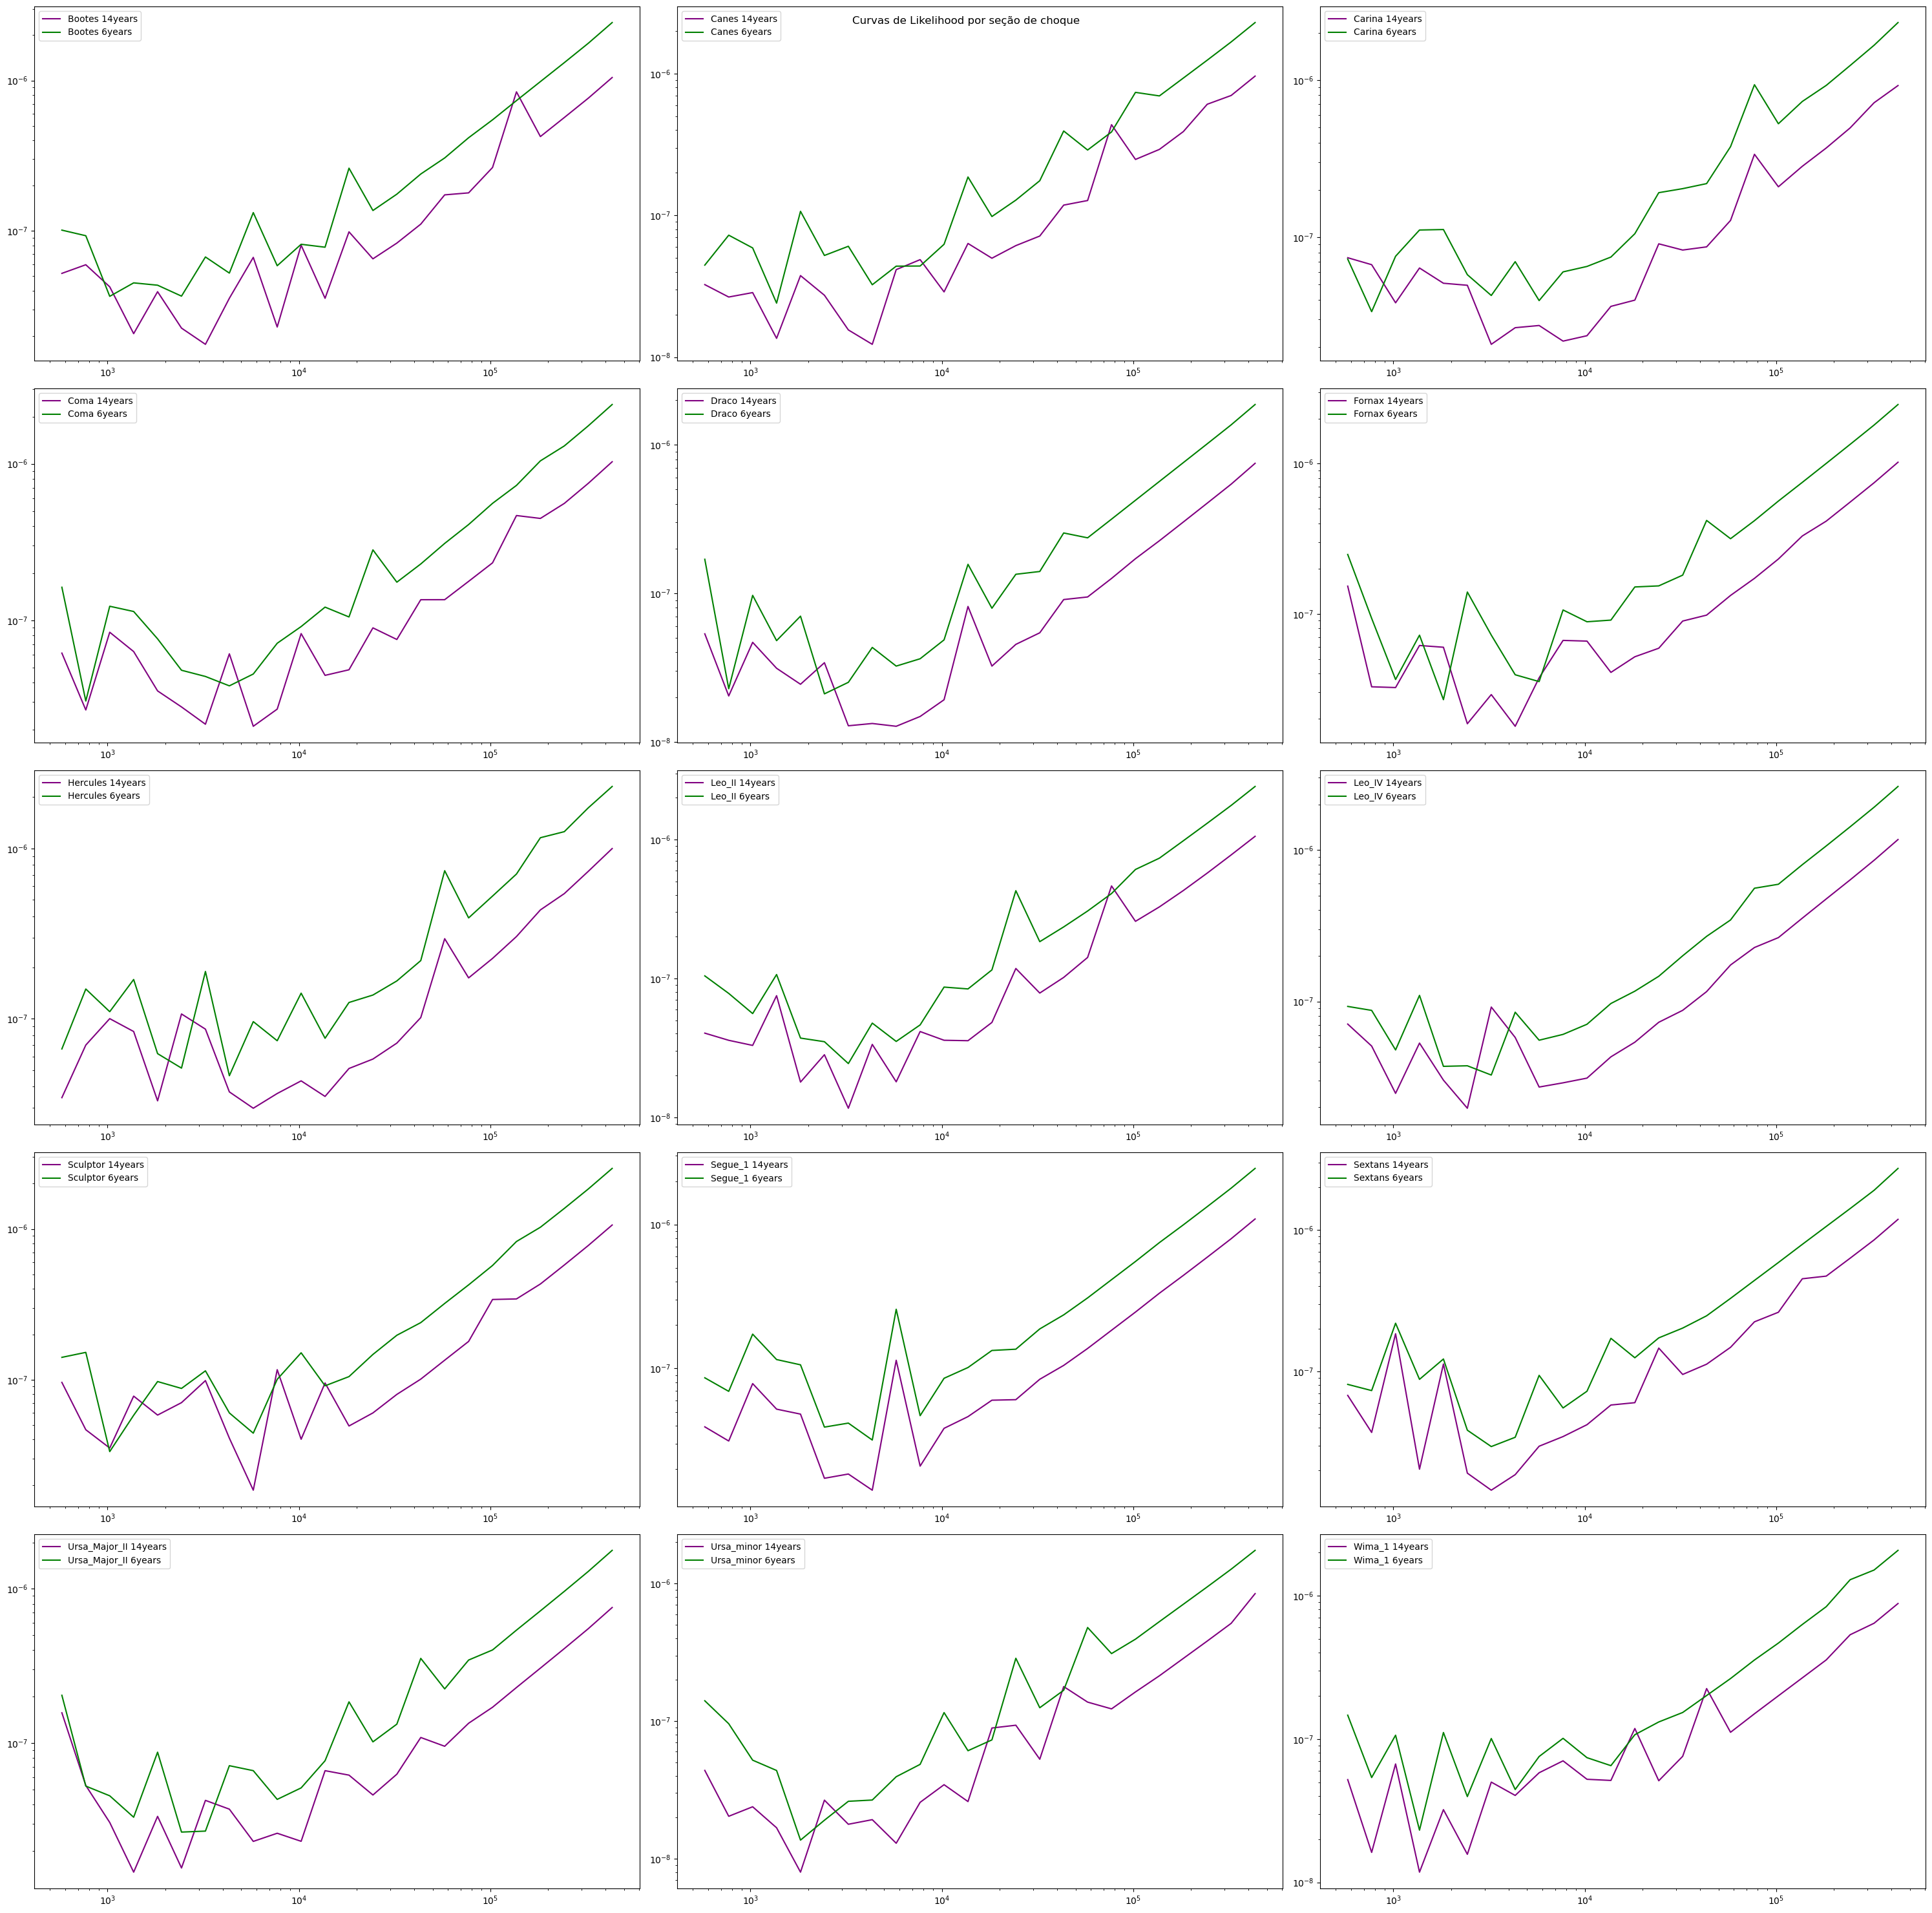

In [22]:
plt.figure(figsize=(30, 30))
for i, name in enumerate(list_nomes):
    ax = plt.subplot(5,3,i+1)
    plt.plot(ebin,Matriz_valores[i],color ='purple', label = name+" 14years")
    plt.plot(ebin,Matriz_valores_6years[i],color ='green', label = name+" 6years")
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
plt.suptitle('Curvas de Likelihood por seção de choque')   
plt.tight_layout() 

# Plotando gráficos de Seção de Choque.

Objetivo, verificar como aas somas mudam o valor a do upper limit a 95%
Para isso, eu vou ter que plotar o gráfico das somas e plotando o valor a 95%.
Vou precisar desenvolver o código.

In [45]:
lista_de_crossections_14years =glob.glob('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_*')
lista_de_lnl =glob.glob('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_*')
lista_de_lnl_6years = glob.glob('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_*')
crossection =  np.loadtxt('crossection_scan_P8R3')


In [37]:
lista_de_lnl_6years = glob.glob('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_*')
np.loadtxt(lista_de_lnl_6years[0])[20]

array([-7.97729766e-01, -7.97737385e-01, -7.97744997e-01, ...,
       -5.47881333e+03, -5.49416618e+03, -5.50959258e+03])

In [44]:
lista_de_lnl_6years

array([-7.97729766e-01, -7.97737385e-01, -7.97744997e-01, ...,
       -5.47881333e+03, -5.49416618e+03, -5.50959258e+03])

In [46]:
lnl_aux_6years = np.zeros(5000)
for i in range(len(lista_de_crossections_14years)):
    #lnl_6years = np.loadtxt(lista_de_lnl_6years[i])[20]
    #lnl_aux_6years+= lnl_6years
     np.loadtxt(lista_de_lnl_6years[i])[20]

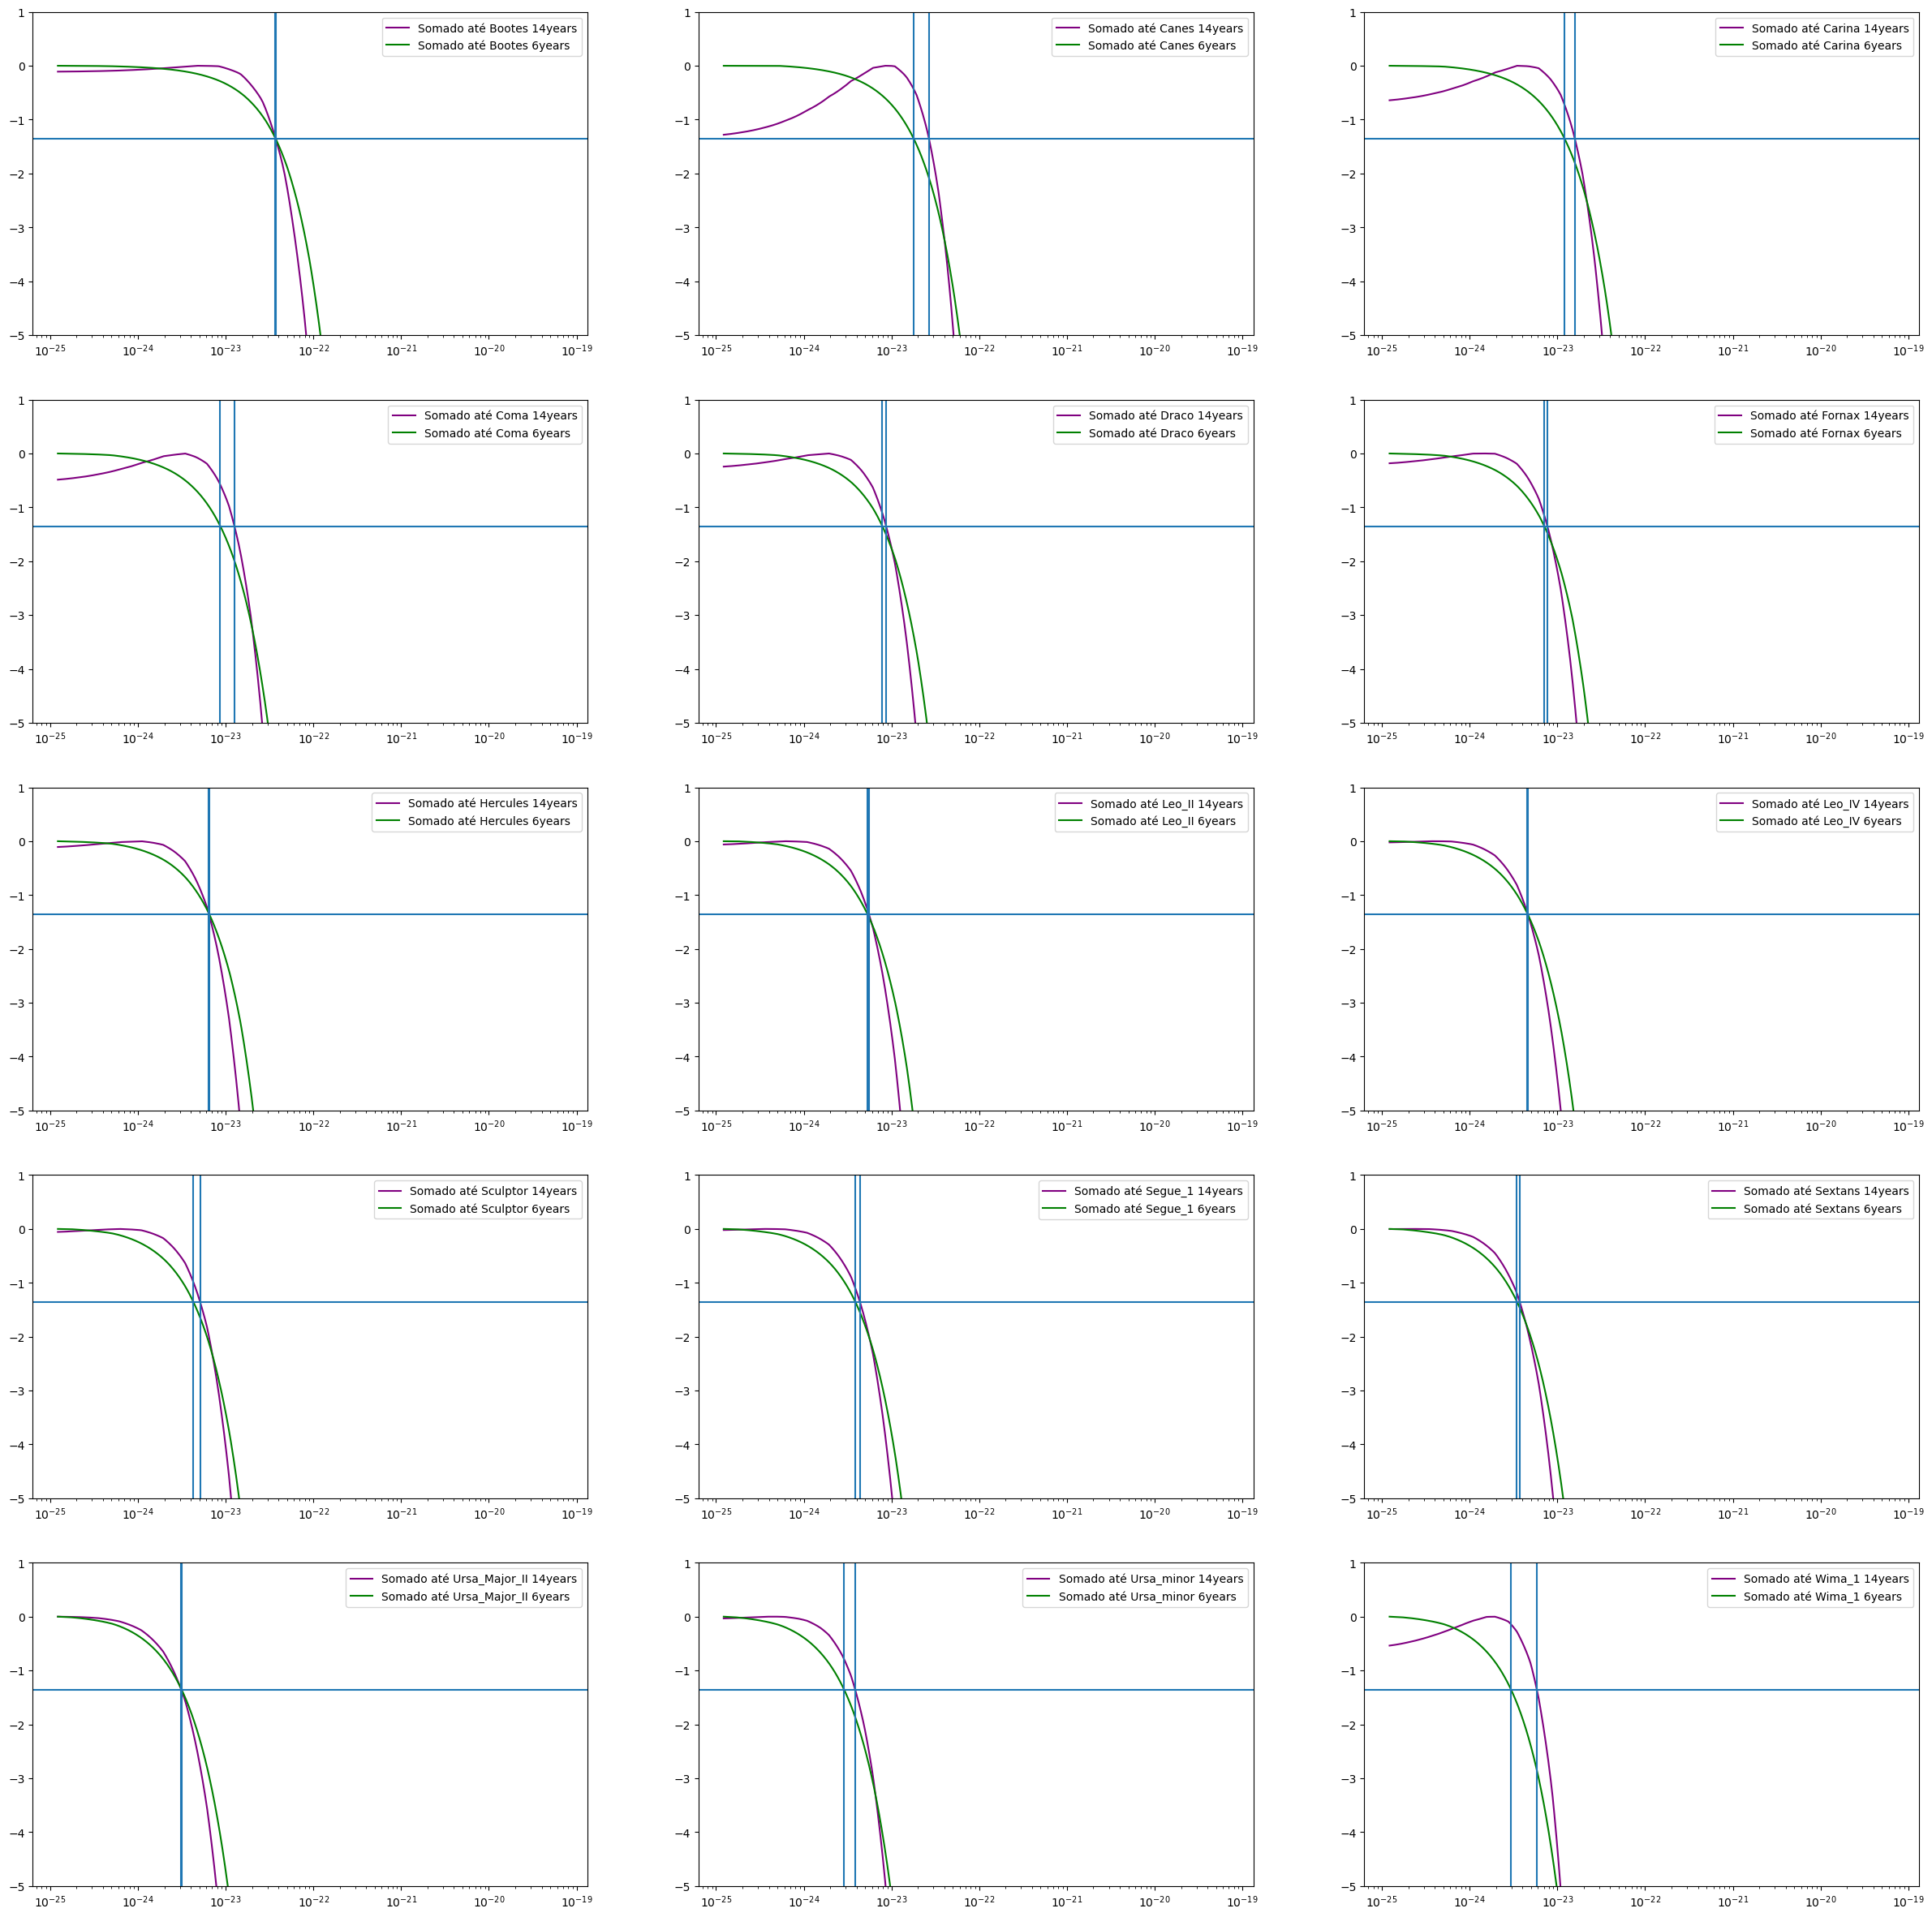

In [47]:
lnl_aux =  np.zeros(5000)
lnl_aux_6years = np.zeros(5000)
plt.figure(figsize=(30, 30))
for i in range(len(lista_de_crossections_14years)):
    lnl= np.loadtxt(lista_de_lnl[i])[20]
    lnl_6years = np.loadtxt(lista_de_lnl_6years[i])[20]
    lnl_aux+=lnl
    lnl_aux_6years+= lnl_6years
    ax = plt.subplot(5,3,i+1)
    plt.plot(crossection[20],lnl_aux-lnl_aux.max(),color = 'purple', label = "Somado até "+ list_nomes[i]+" 14years")
    plt.plot(crossection[20],lnl_aux_6years-lnl_aux_6years.max(),color = 'green', label = "Somado até "+ list_nomes[i] +" 6years")
    plt.xscale('log')
    plt.gca().set_ylim(-5,1)
    plt.gca().axvline(utils.get_parameter_limits(crossection[20],lnl_aux)['ul'])
    plt.gca().axvline(utils.get_parameter_limits(crossection[20],lnl_aux_6years)['ul'])
    plt.gca().axhline(-2.71/2)
    plt.legend()



##  Mostre que as seções de choque ficam diferentes utilizando esse Scan

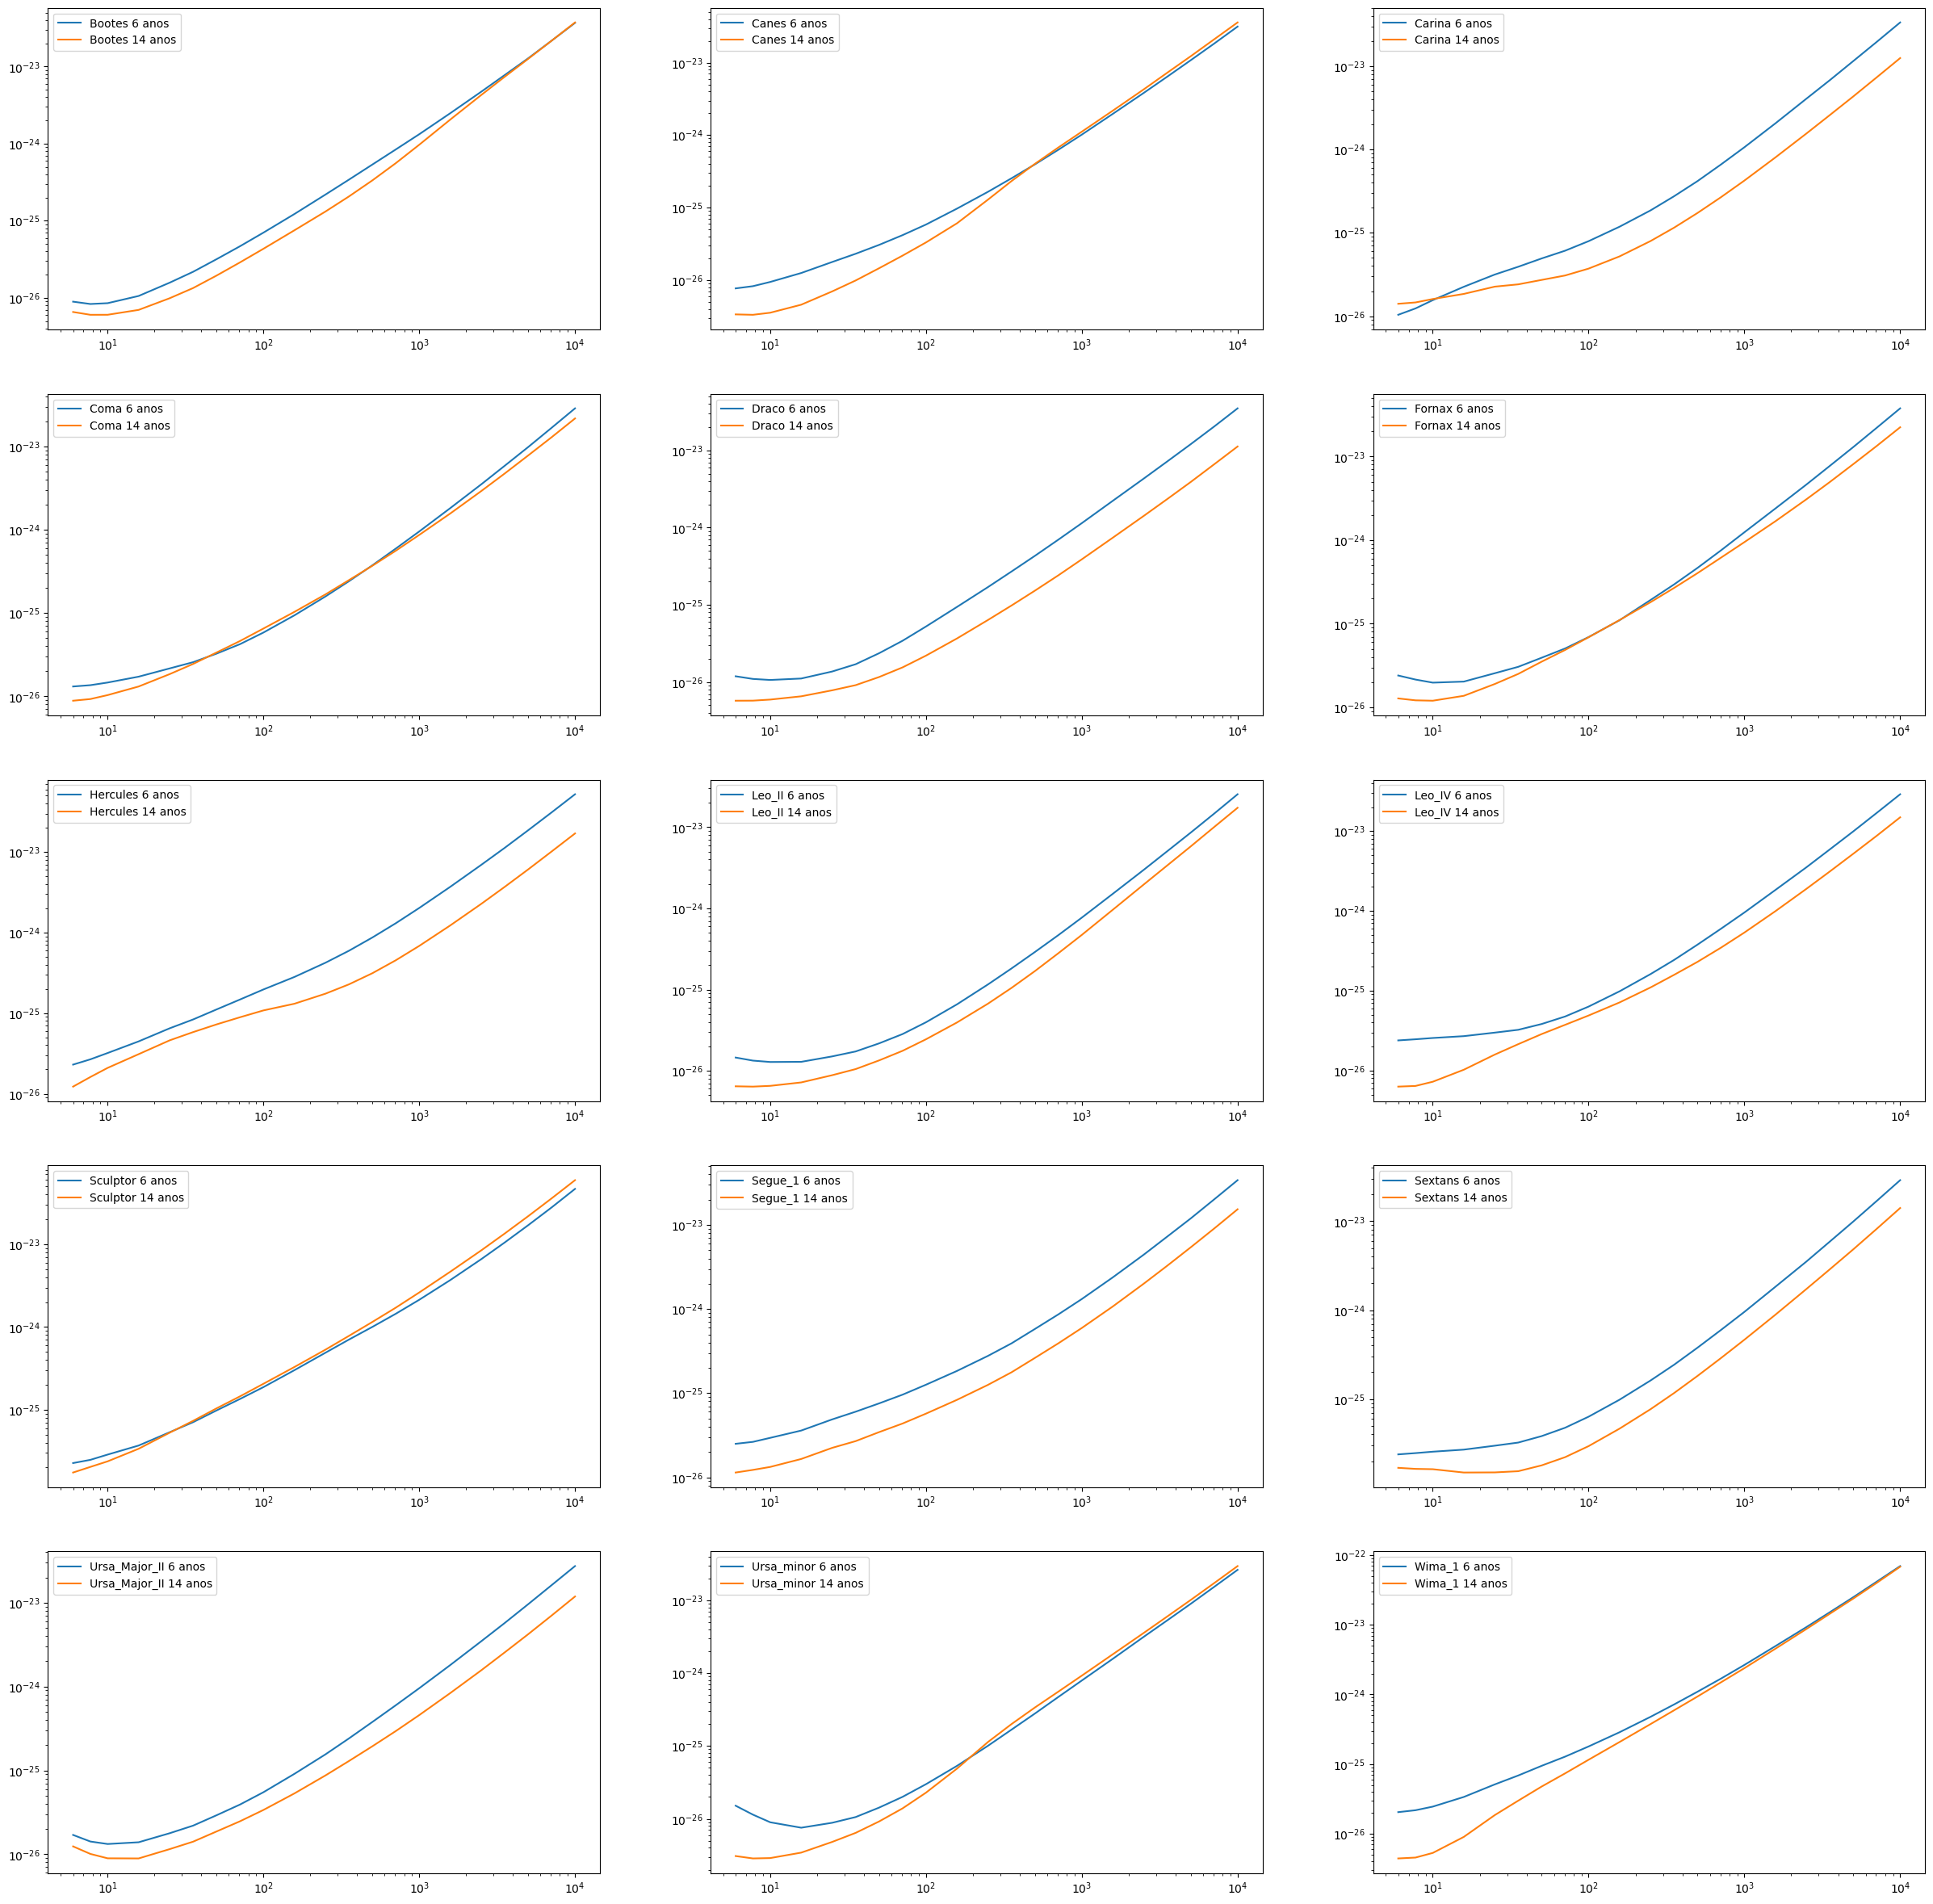

In [54]:
mass = np.loadtxt('limits_bb.txt',unpack=True)[0]
crossection_upper_limit_14years = np.zeros(len(mass))
crossection_upper_limit_6years = np.zeros(len(mass))
plt.figure(figsize=(30, 30))
for i in range(len(lista_de_lnl)):
    lnl_14years = np.loadtxt(lista_de_lnl[i])
    lnl_6years = np.loadtxt(lista_de_lnl_6years[i])
    
    for j in range(len(crossection)):
        crossection_upper_limit_14years[j] = utils.get_parameter_limits(crossection[j],lnl_14years[j])['ul']
        crossection_upper_limit_6years[j]  =utils.get_parameter_limits(crossection[j],lnl_6years[j])['ul']
    ax = plt.subplot(5,3,i+1)    
    plt.plot(mass,crossection_upper_limit_6years,  label = list_nomes[i] + " 6 anos")
    plt.plot(mass,crossection_upper_limit_14years, label = list_nomes[i] + " 14 anos")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()

In [148]:
import pyLikelihood
import os
from scipy.interpolate import interp1d
from scipy.integrate import quad


In [149]:
likefile = 'likes_files/like_willman_1.txt' # varialvel associada ao https://www-glast.stanford.edu/pub_data/1048/like_draco.txt
specfile = 'spectrum_bbbar_100GeV.txt'
data = np.loadtxt(likefile, unpack=True)
emins, emaxs = np.unique(data[0]),np.unique(data[1])
efluxes = data[2].reshape(len(emins),-1)
Spectrum =np.loadtxt(specfile,unpack=True)
sigmav0 =1e-25


In [150]:
epsilon = 1e-4 # Just to make sure we stay within the interpolation range
xmin =  epsilon 
xmax = np.log10(efluxes.max()/efluxes[efluxes>0].min()) - epsilon 
x = np.logspace(xmin,xmax,5000) 
Jfactor_min = 16.3
Jfactor_max = 19.4

In [155]:
def eflux(spectrum, emin=1e2, emax=1e5, quiet=False):
    """ Integrate a generic spectrum, multiplied by E, to get the energy flux.
    """
    espectrum = lambda e: spectrum(e)*e
    tol = min(espectrum(emin),espectrum(emax))*1e-10
    try:
        return quad(espectrum,emin,emax,epsabs=tol,full_output=True)[0]
    except (Exception, msg):
        print('Numerical error "%s" when calculating integral flux.' % msg)
        return np.nan
# Keep numpy from complaining about dN/dE = 0...

np.seterr(divide='ignore',invalid='ignore')
dmf = pyLikelihood.DMFitFunction()
dmf.readFunction(os.path.expandvars('$FERMIPY_ROOT/data/gammamc_dif.dat'))
dmf.setParam('norm',10**Jfactor_max)
dmf.setParam('sigmav',1E-25)
dmf.setParam('mass',mass[20])
dmf.setParam('bratio',1.0)
dmf.setParam('channel0',4)  

energy = Spectrum[0] 
dnde = np.zeros(energy.shape)
for j in range(len(energy)):
    dnde[j] = dmf(pyLikelihood.dArg(energy[j]))
log_energy = np.log10(energy)# Transforma energia para log
log_dnde = np.log10(dnde)# Transforma Espectro para log
log_interp = interp1d(log_energy,log_dnde) # Cria função de Interpolação entre energia e espectro
spectrum = lambda e: np.nan_to_num(10**( log_interp(np.log10(e)) ))# Retorna um Valor de dn/de para um valor de energia
pred = np.array([eflux(spectrum,e1,e2) for e1,e2 in zip(emins,emaxs)])  # Retorna o Eflux esperado por Bin

In [153]:
valor_min = pred.max()

In [156]:
valor_max = pred.max()

In [157]:
valor_max

4.5855682169706465e-10

In [158]:
valor_min

3.64244630699408e-13

In [159]:
norm0_min = efluxes[efluxes>0].min() / valor_min# Cria um valor de normalização
norms_min = norm0_min * x # normaliza o scan range 

In [160]:
norm0_max = efluxes[efluxes>0].min() / valor_max # Cria um valor de normalização
norms_max = norm0_max * x # normaliza o scan range 

In [162]:
norms_min/norms_max

array([1258.92541179, 1258.92541179, 1258.92541179, ..., 1258.92541179,
       1258.92541179, 1258.92541179])

In [166]:
sigmav_min = sigmav0*norms_min

In [172]:
sigmav_max = sigmav0*norms_max

In [167]:
sigmav_max/sigmav_min

array([7.94145355e-04, 7.92044915e-04, 7.89950030e-04, ...,
       1.42036637e-09, 1.41660963e-09, 1.41286283e-09])

In [173]:
sigmav_max

array([3.86552773e-26, 3.87577880e-26, 3.88605706e-26, ...,
       2.16126695e-20, 2.16699846e-20, 2.17274517e-20])

In [169]:
sigmav_min

array([4.86641109e-23, 4.87931643e-23, 4.89225599e-23, ...,
       2.72087389e-17, 2.72808943e-17, 2.73532411e-17])

In [210]:
teste = 1e-25*np.logspace(1,6,5000)

In [189]:

utils.get_parameter_limits(np.loadtxt(lista_de_crossections_14years[0])[20],np.loadtxt(lista_de_lnl[0])[20])['ul']

1.869170561625007e-22

In [211]:
utils.get_parameter_limits(teste,np.loadtxt(lista_de_lnl[0])[20])['ul']

1.4518929047025572e-22

In [180]:
np.loadtxt(lista_de_crossections_14years[0])[20]

array([6.11109378e-25, 6.12729992e-25, 6.14354903e-25, ...,
       3.41679220e-19, 3.42585327e-19, 3.43493836e-19])

In [212]:
teste

array([1.00000000e-24, 1.00230570e-24, 1.00461672e-24, ...,
       9.95404500e-20, 9.97699604e-20, 1.00000000e-19])

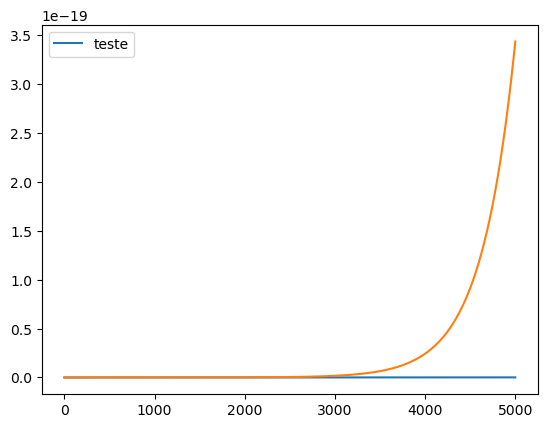

In [200]:
plt.plot(teste, label ='teste')
plt.plot(np.loadtxt(lista_de_crossections_14years[0])[20])
plt.legend()
#plt.yscale('log')

In [197]:
np.loadtxt(lista_de_crossections_14years[0])[20]/teste

array([6111.09378189, 6110.38955309, 6109.68540544, ..., 3435.73016259,
       3435.33423671, 3434.93835647])